# Contexto
O stockAI foi criado para o megahack 2ª edição 2020, partindo do enunciado do desafio do SEBRAE que busca auxiliar pequenas empresas após a pandemia do COVID-19, buscamos trazer soluções para prover uma administração de estoque mais inteligente e estratégica.
Quem nunca teve problema de estoque em sua empresa? Esqueceu de fazer pedido de alguma mercadoria ou esqueceu do prazo de validade? Visando isso nossa equipe Propôs um sitema de gerenciamento de estoque que fornecesse metricas, aprendesse padrões de vendas e reposição de estoque a fim de fornecer ao empresário um maior controle e autoconhecimento sobre o seu negócio.
Esta aplicação corresponde ao módulo de Machine Learning desenvolvido para atuar juntamente a um sistema web. Como dito anteriormente foi idealizada para um hackathon e estará em constante evolução.

# DataSet
Os dados usados foram provenientes de uma simulação de vendas e reposição de estoque de um supermercado ficticio, todos os dados foram gerados pelos prórpios autores do código. Foi gerado cerca de um ano de transações  para cerca de 28 produtos diferentes.

# Objetivos
Dado a simulação descrita acima o nosso objetivo era prover para o sistema web notificações em relação ao estoque. Um dos principais pontos seria a predição de falta de produtos baseado no histórico de saida e entrada do mesmo.
O segundo ponto atacado na nossa solução foi a predição de produtos que venceriam antes de ter todo o seu lote vendido, com base nas datas de fabricação e validade associadas ao histórico de vendas de um determinado produto buscamos levar ao dono do mercado uma noção de quantos produtos ele iria perder caso estocasse n lotes do mesmo.
A gestão de estoque em supermercados de pequeno estoque tendem a ser mal planejadas e mal administradas principalmente pelo pouco uso de tecnologia, porém a pandemia em que vivemos tende a exigir uma gestão mais eficiente ainda, por isso entendemos que uma ferramenta como o stockAI pode trazer inúmeros benefícios e sanar algumas dores.


In [1]:
import pandas as pd
import numpy as np

In [2]:
base = pd.read_json('/kaggle/input/megahack-stockai/data_stock.json')
base_saida = pd.read_json('/kaggle/input/megahack-stockai/label_stock.json')

In [3]:
base

,name,price,sale,stock,date,date_fab,lote,date_val,qtd_day
0,Arroz Tio Urbano 1 Kg,2.89,0,50,2020-01-01,2019-12-31,1,2020-01-15,15
1,Arroz Tio Urbano 1 Kg,2.89,16,34,2020-01-02,2019-12-31,1,2020-01-15,15
2,Arroz Tio Urbano 1 Kg,2.89,14,20,2020-01-03,2019-12-31,1,2020-01-15,15
3,Arroz Tio Urbano 1 Kg,2.89,2,18,2020-01-04,2019-12-31,1,2020-01-15,15
4,Arroz Tio Urbano 1 Kg,2.89,10,8,2020-01-05,2019-12-31,1,2020-01-15,15
...,...,...,...,...,...,...,...,...,...
1731,Camarão 500g,27.90,16,34,2020-02-29,2020-6-28,10,2020-7-18,20
1732,Camarão 500g,27.90,11,23,2020-03-01,2020-6-28,10,2020-7-18,20
1733,Camarão 500g,27.90,18,5,2020-03-02,2020-6-28,10,2020-7-18,20
1734,Camarão 500g,27.90,5,50,2020-03-03,2020-7-18,11,2020-8-7,20


In [4]:
base['sale'].sum()

14145

In [5]:
base['stock'].sum()

50829

In [6]:
base_saida

,new_stock,stock_date_expiration,sell_loss
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1731,0,0,0
1732,0,0,0
1733,0,0,0
1734,1,0,2


In [7]:
previsores= base.iloc[:,0:9].values
classe_1 = base_saida.iloc[:,0].values
classe_2 = base_saida.iloc[:,1].values
classe_3 = base_saida.iloc[:,2].values

In [8]:
import calendar
import datetime  
import matplotlib.pyplot as pl
from datetime import datetime as dt

In [9]:
analisando_vendas_camarao=base.loc[base.name=='Camarão 500g',['name','date','sale']]


In [10]:
analisando_vendas_camarao

,name,date,sale
1674,Camarão 500g,2020-01-01,0
1675,Camarão 500g,2020-01-02,9
1676,Camarão 500g,2020-01-03,6
1677,Camarão 500g,2020-01-04,17
1678,Camarão 500g,2020-01-05,9
...,...,...,...
1731,Camarão 500g,2020-02-29,16
1732,Camarão 500g,2020-03-01,11
1733,Camarão 500g,2020-03-02,18
1734,Camarão 500g,2020-03-03,5


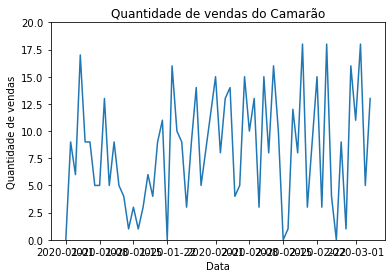

In [11]:
pl.title('Quantidade de vendas do Camarão')
pl.xlabel('Data')
pl.ylabel('Quantidade de vendas')
pl.ylim(0, 20)
pl.plot(analisando_vendas_camarao['date'],analisando_vendas_camarao['sale'])
pl.show()



In [12]:
analisando_estoque_camarao=base.loc[base.name=='Camarão 500g',['name','date','stock']]

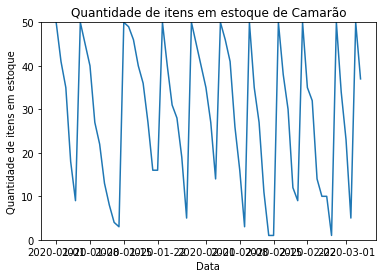

In [13]:
pl.title('Quantidade de itens em estoque de Camarão')
pl.xlabel('Data')
pl.ylabel('Quantidade de itens em estoque')
pl.ylim(0, 50)
pl.plot(analisando_estoque_camarao['date'],analisando_estoque_camarao['stock'])
pl.show()

In [14]:
analisando_vendas_camarao2=base
analisando_vendas_camarao2['date']=base['date'].dt.month_name()

In [15]:
analisando_vendas_camarao2=base.loc[base.name=='Camarão 500g',['name','date','sale']]

In [16]:
analisando_vendas_camarao2.date

1674     January
1675     January
1676     January
1677     January
1678     January
          ...   
1731    February
1732       March
1733       March
1734       March
1735       March
Name: date, Length: 62, dtype: object

In [17]:
y_pos=np.arange(len(analisando_vendas_camarao2))

In [18]:
analisando_vendas_camarao_j=analisando_vendas_camarao2.loc[analisando_vendas_camarao2.date=='January',['date','sale']]
analisando_vendas_camarao_f=analisando_vendas_camarao2.loc[analisando_vendas_camarao2.date=='February',['date','sale']]
analisando_vendas_camarao_m=analisando_vendas_camarao2.loc[analisando_vendas_camarao2.date=='March',['date','sale']]


In [19]:
analisando_vendas_camarao_f['sale'].sum()

266

In [20]:
sales_c=[]
sales_c.append(analisando_vendas_camarao_j['sale'].sum())
sales_c.append(analisando_vendas_camarao_f['sale'].sum())
sales_c.append(analisando_vendas_camarao_m['sale'].sum())
mes=['Janeiro','Fevereiro', 'Março']
y_pos=np.arange(len(mes))

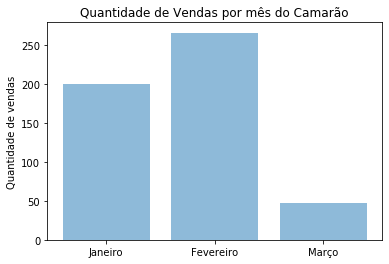

In [21]:
pl.bar(y_pos,  sales_c,align='center', alpha=0.5)
pl.xticks(y_pos, mes)
pl.ylabel('Quantidade de vendas')
pl.title('Quantidade de Vendas por mês do Camarão')
pl.show()

1. new_stock: Quando um stock é preciso ser renovado(se não for o cliente irá perder dinheiro) 0= quando não precisa e 1= quando foi renovado
2. stock_date_expiration: Quando existe algum produto que está vencido no stock (0=não tem protuo vencido e 1=quando tem)
3. sell_loss: Quantidade de perdas no estoque

In [22]:
classe_1

array([0, 0, 0, ..., 0, 1, 0])

In [23]:
classe_3

array([0, 0, 0, ..., 0, 2, 0])

In [24]:
classe_2

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [26]:
label_previsores=LabelEncoder()

In [27]:
previsores[:,0]=label_previsores.fit_transform(previsores[:,0])
previsores[:,4]=label_previsores.fit_transform(previsores[:,4])
previsores[:,5]=label_previsores.fit_transform(previsores[:,5])
previsores[:,7]=label_previsores.fit_transform(previsores[:,7])

In [28]:
previsores

array([[1, 2.89, 0, ..., 1, 2, 15],
       [1, 2.89, 16, ..., 1, 2, 15],
       [1, 2.89, 14, ..., 1, 2, 15],
       ...,
       [6, 27.9, 18, ..., 10, 95, 20],
       [6, 27.9, 5, ..., 11, 105, 20],
       [6, 27.9, 13, ..., 11, 105, 20]], dtype=object)

In [29]:
previsores.shape

(1736, 9)

In [30]:
from sklearn.preprocessing import StandardScaler
escalona = StandardScaler()

In [31]:
previsores=escalona.fit_transform(previsores)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
def random_forest_1(previsores,classe_1):
    previsores_treinamento1 , previsores_teste1,classe_treinamento1, classe_teste1=train_test_split(previsores,classe_1,test_size=0.25, random_state=0)
    classificador_random_florest1=RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
    classificador_random_florest1.fit(previsores_treinamento1,classe_treinamento1)
    previsao_1=classificador_random_florest1.predict(previsores_teste1)
    precisao_label1=accuracy_score(classe_teste1,previsao_1)
    matriz=confusion_matrix(classe_teste1,previsao_1)
    return precisao_label1, matriz

In [34]:
precisao,matriz=random_forest_1(previsores,classe_1)

In [35]:
precisao

0.9861751152073732

In [36]:
matriz

array([[356,   3],
       [  3,  72]])

In [37]:
precisao2,matriz2=random_forest_1(previsores,classe_2)
precisao3,matriz3=random_forest_1(previsores,classe_3)

In [38]:
matriz2,matriz3

(array([[434]]),
 array([[370,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   4,   0,   1,   0,   2,   0,   0,   0,   0,   0,   1,   0,
           0,   0,   0,   0],
        [  0,   0,   2,   0,   3,   1,   1,   0,   1,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  2,   0,   0,   1,   1,   2,   1,   0,   1,   0,   1,   0,   0,
           0,   1,   0,   0],
        [  0,   1,   1,   0,   1,   0,   0,   0,   2,   1,   0,   0,   2,
           0,   0,   0,   0],
        [  0,   0,   0,   1,   1,   0,   0,   0,   2,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  1,   0,   0,   1,   0,   1,   0,   0,   1,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,   0,   0],
        [  0,   1,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   1,
           0,   0,   0,   0],
        [  0,   0,   1,   0,   0,   1,   0,   0

In [39]:
array=[]

In [40]:
array.append({'precisão':precisao, 'label': "new_stock", "model":"random_florest"})
array.append({'precisão':precisao2, 'label': "stock_date_expiration", "model":"random_florest"})
array.append({'precisão':precisao3, 'label': "sell_loss", "model":"random_florest"})

In [41]:
array

[{'precisão': 0.9861751152073732,
  'label': 'new_stock',
  'model': 'random_florest'},
 {'precisão': 1.0,
  'label': 'stock_date_expiration',
  'model': 'random_florest'},
 {'precisão': 0.8709677419354839,
  'label': 'sell_loss',
  'model': 'random_florest'}]

**** Arvore de decisão

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
def tree_decision_1(previsores, classe_1):
    previsores_treinamento1 , previsores_teste1,classe_treinamento1, classe_teste1=train_test_split(previsores,classe_1,test_size=0.25, random_state=0)
    classificador1=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classificador1.fit(previsores_treinamento1,classe_treinamento1)
    previsoes1=classificador1.predict(previsores_teste1)
    precisao1=accuracy_score(classe_teste1,previsoes1)
    matriz1=confusion_matrix(classe_teste1,previsoes1)
    return precisao1, matriz1

In [44]:
precisao1,matriz1=tree_decision_1(previsores,classe_1)
precisao2,matriz2=tree_decision_1(previsores,classe_2)
precisao3,matriz3=tree_decision_1(previsores,classe_3)

In [45]:
array.append({'precisão':precisao1, 'label': "new_stock", "model":"tree_decision"})
array.append({'precisão':precisao2, 'label': "stock_date_expiration", "model":"tree_decision"})
array.append({'precisão':precisao3, 'label': "sell_loss", "model":"tree_decision"})

In [46]:
array

[{'precisão': 0.9861751152073732,
  'label': 'new_stock',
  'model': 'random_florest'},
 {'precisão': 1.0,
  'label': 'stock_date_expiration',
  'model': 'random_florest'},
 {'precisão': 0.8709677419354839,
  'label': 'sell_loss',
  'model': 'random_florest'},
 {'precisão': 0.9861751152073732,
  'label': 'new_stock',
  'model': 'tree_decision'},
 {'precisão': 1.0, 'label': 'stock_date_expiration', 'model': 'tree_decision'},
 {'precisão': 0.8617511520737328,
  'label': 'sell_loss',
  'model': 'tree_decision'}]

**** Rede neural

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [48]:
onehotencoder= OneHotEncoder(categories='auto', drop=None, sparse=True, dtype='float64', handle_unknown='error')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [49]:
def neural_network(previsores, classe_1):
    previsores_treinamento1, previsores_teste1,classe_treinamento1, classe_teste1=train_test_split(previsores,classe_1,test_size=0.25, random_state=0)
    classificador=Sequential()
    classificador.add(Dense(units=55,activation='relu',input_dim=420))
    classificador.add(Dense(units=55,activation='relu'))
    classificador.add(Dense(units=1,activation='sigmoid'))#camada binária retorna sigmode
    classificador.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    classificador.fit(previsores_treinamento1,classe_treinamento1,batch_size=10,epochs=100)
    previsoes1=classificador.predict(previsores_teste1)
    previsoes1=(previsoes1>0.5)
    precisao1=accuracy_score(classe_teste1,previsoes1)
    matriz1=confusion_matrix(classe_teste1,previsoes1)
    return precisao1, matriz1;

In [50]:
precisao1,matriz1=neural_network(previsores,classe_1)
precisao2,matriz2=neural_network(previsores,classe_2)
precisao3,matriz3=neural_network(previsores,classe_3)

Epoch 1/100
1302/1302 [==============================] - 1s 422us/step - loss: 0.3869 - accuracy: 0.8341
Epoch 2/100
1302/1302 [==============================] - 0s 147us/step - loss: 0.0991 - accuracy: 0.9731
Epoch 3/100
1302/1302 [==============================] - 0s 148us/step - loss: 0.0313 - accuracy: 0.9885
Epoch 4/100
1302/1302 [==============================] - 0s 150us/step - loss: 0.0129 - accuracy: 0.9977
Epoch 5/100
1302/1302 [==============================] - 0s 146us/step - loss: 0.0055 - accuracy: 0.9992
Epoch 6/100
1302/1302 [==============================] - 0s 146us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/100
1302/1302 [==============================] - 0s 147us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/100
1302/1302 [==============================] - 0s 147us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/100
1302/1302 [==============================] - 0s 151us/step - loss: 8.2135e-04 - accuracy: 1.0000
Epoch 10/100
1302/1302 [===========================

In [51]:
array.append({'precisão':precisao1, 'label': "new_stock", "model":"neural_network"})
array.append({'precisão':precisao2, 'label': "stock_date_expiration", "model":"neural_network"})
array.append({'precisão':precisao3, 'label': "sell_loss", "model":"neural_network"})

In [52]:
array

[{'precisão': 0.9861751152073732,
  'label': 'new_stock',
  'model': 'random_florest'},
 {'precisão': 1.0,
  'label': 'stock_date_expiration',
  'model': 'random_florest'},
 {'precisão': 0.8709677419354839,
  'label': 'sell_loss',
  'model': 'random_florest'},
 {'precisão': 0.9861751152073732,
  'label': 'new_stock',
  'model': 'tree_decision'},
 {'precisão': 1.0, 'label': 'stock_date_expiration', 'model': 'tree_decision'},
 {'precisão': 0.8617511520737328,
  'label': 'sell_loss',
  'model': 'tree_decision'},
 {'precisão': 0.9861751152073732,
  'label': 'new_stock',
  'model': 'neural_network'},
 {'precisão': 1.0,
  'label': 'stock_date_expiration',
  'model': 'neural_network'},
 {'precisão': 0.5069124423963134,
  'label': 'sell_loss',
  'model': 'neural_network'}]

# Resultado
Apesar das limitações de tempo oferecidos pelo hackaton, simulamos um dataset com a nossa proposta. Obtivamos resultados bons como podem ser vistos. Mas poderiamos melhorar as saidas da IA. Exemplo o label **sell_loss** ser alterado ao invés de retorna uma quantidade exata das perdas no lote, retorna um parametro para o cliente exemplo: "<10" ou "10> && <50" ou "50>". Com essa alteração fornecemos três saidas possiveis para esse label. (O data desse projeto será melhorado no futuro)